In [7]:
import os
import shutil
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to convert audio to waveform image
def save_waveform_image(audio_path, save_path):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        plt.figure(figsize=(14, 5))
        plt.plot(y)
        plt.title('Waveform')
        plt.savefig(save_path)
        plt.close('all')
    except:
        print('fail')
        pass
# Preprocess audio files to waveform images

def preprocess_audio_files(audio_dir, image_dir):
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    for subdir, _, files in os.walk(audio_dir):
        for file in files:
            if file.endswith(('.wav','.flac')):
                audio_path = os.path.join(subdir, file)
                relative_path = os.path.relpath(audio_path, audio_dir)
                if file.endswith('.wav'):
                    save_path = os.path.join(image_dir, relative_path.replace('.wav', '.png'))
                if file.endswith('.flac'):
                    save_path = os.path.join(image_dir, relative_path.replace('.flac', '.png'))
                save_dir = os.path.dirname(save_path)
                if not os.path.exists(save_dir):
                    os.makedirs(save_dir)
                save_waveform_image(audio_path, save_path)

# Organize images into train and test directories
def organize_images(image_dir, train_dir, test_dir, test_size=0.2):
    categories = ['real2000', 'fake2000']
    for category in categories:
        category_dir = os.path.join(image_dir, category)
        images = [os.path.join(category_dir, img) for img in os.listdir(category_dir) if img.endswith('.png')]
        train_images, test_images = train_test_split(images, test_size=test_size)
        
        for img_set, set_dir in zip([train_images, test_images], [train_dir, test_dir]):
            category_set_dir = os.path.join(set_dir, category)
            if not os.path.exists(category_set_dir):
                os.makedirs(category_set_dir)
            for img_path in img_set:
                shutil.copy(img_path, category_set_dir)


In [5]:
real_audio_dir =r'C:\Users\alisa\Downloads\2000realaudio'
fake_audio_dir = r'C:\Users\alisa\Downloads\2000fakeaudio'
real_image_dir = 'allimages/real2000'
fake_image_dir = 'allimages/fake2000'
image_dir = 'allimages'
train_dir = 'allimages/train'
test_dir = 'allimages/test'


In [4]:
preprocess_audio_files(real_audio_dir, real_image_dir)

C:\Users\alisa\AppData\Local\Temp\ipykernel_18168\2226767341.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


fail
fail
fail
fail
fail
fail
fail
fail


In [24]:
preprocess_audio_files(fake_audio_dir, fake_image_dir)


In [8]:
organize_images(image_dir, train_dir, test_dir)


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(128, 128),
                                                         batch_size=32,
                                                         class_mode='binary',
                                                         subset='validation')


Found 3176 images belonging to 2 classes.
Found 559 images belonging to 2 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)


C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 89s 819ms/step - accuracy: 0.5499 - loss: 0.8800 - val_accuracy: 0.7243 - val_loss: 0.5481
Epoch 2/20
 1/99 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.7812 - loss: 0.5065

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7812 - loss: 0.5065 - val_accuracy: 0.8000 - val_loss: 0.4821
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 424ms/step - accuracy: 0.7337 - loss: 0.5291 - val_accuracy: 0.7849 - val_loss: 0.4247
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 0.7279 - val_accuracy: 0.6667 - val_loss: 0.6095
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 422ms/step - accuracy: 0.8137 - loss: 0.4420 - val_accuracy: 0.7684 - val_loss: 0.4394
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.8438 - loss: 0.4336 - val_accuracy: 0.8667 - val_loss: 0.2870
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 428ms/step - accuracy: 0.8107 - loss: 0.4151 - val_accuracy: 0.8070 - val_loss: 0.4265
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.4842 - val_accuracy: 0.8667 - val_loss: 0.3648
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 421ms/step - accuracy: 0.8358 - loss: 0.3874 - val_accuracy: 0.8051 - val_lo

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(128, 128),
                                                  batch_size=32,
                                                  class_mode='binary')
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy:.2f}')

Found 934 images belonging to 2 classes.
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.8366 - loss: 0.3753
Test Accuracy: 0.85


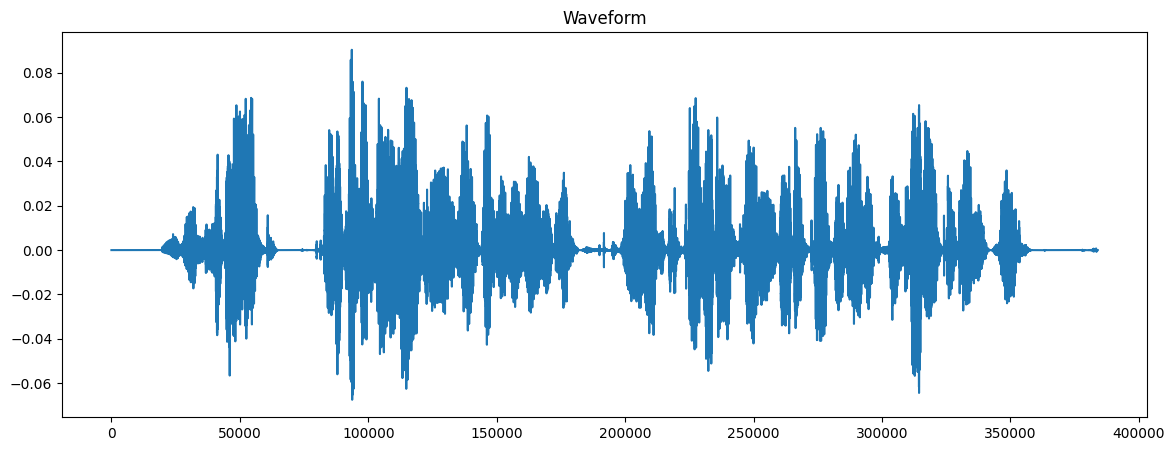

In [16]:
test = r'C:\Users\alisa\Downloads\test.wav'
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

y, sr = librosa.load(test, sr=None)
save_path = 'test'
image_dir = 'allimages'
save_path = os.path.join(image_dir, save_path.replace('.wav', '.png'))
save_dir = os.path.dirname(save_path)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
plt.savefig(save_dir)





In [17]:
path = r'C:\Users\alisa\OneDrive\Desktop\GenGuard\AI-Generated-Speech-Detection\allimages.png'

img = load_img(path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [18]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[0.5967666]], dtype=float32)

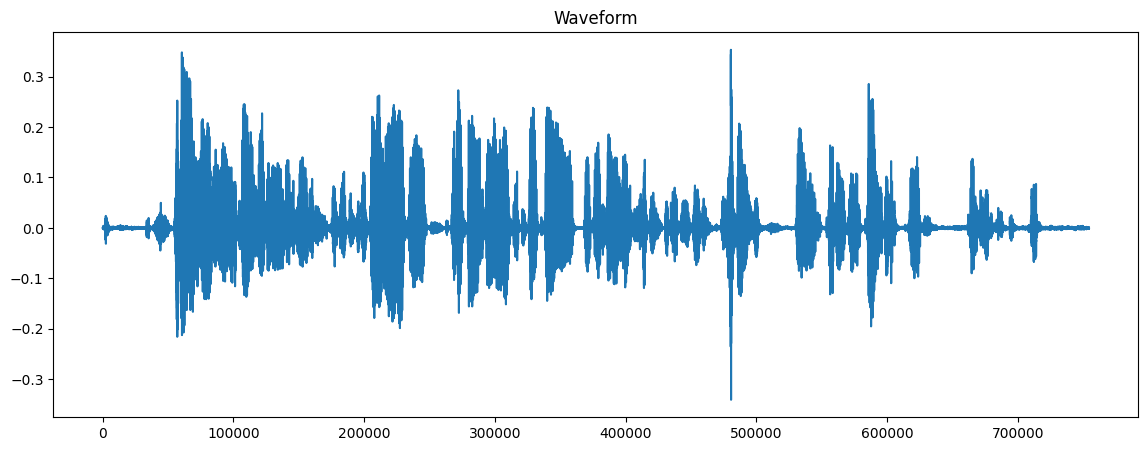

In [36]:
test = r'C:\Users\alisa\Downloads\record_out (1).wav'
y, sr = librosa.load(test, sr=None)
save_path = 'test'
image_dir = 'elevenlabimage'
save_path = os.path.join(image_dir, save_path.replace('.wav', '.png'))
save_dir = os.path.dirname(save_path)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
plt.savefig(save_dir)

In [37]:
path = r'C:\Users\alisa\OneDrive\Desktop\GenGuard\AI-Generated-Speech-Detection\elevenlabimage.png'
img = load_img(path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [38]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.43842053]], dtype=float32)

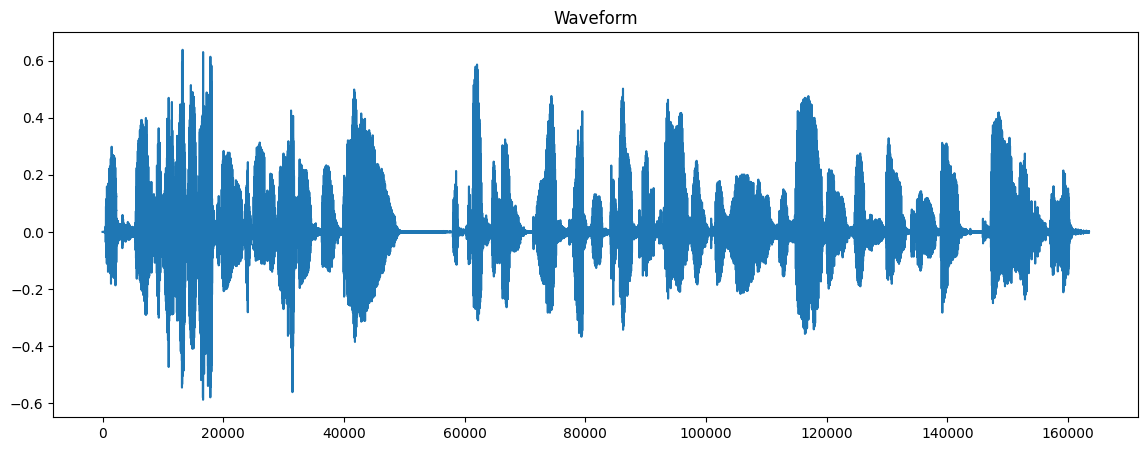

In [27]:
test = r"C:\Users\alisa\Downloads\REAL2\LJ018-0152.wav"
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

y, sr = librosa.load(test, sr=None)
save_path = 'test'
image_dir = 'abeltrial'
save_path = os.path.join(image_dir, save_path.replace('.wav', '.png'))
save_dir = os.path.dirname(save_path)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
plt.savefig(save_dir)





In [28]:
path = r'C:\Users\alisa\OneDrive\Desktop\GenGuard\AI-Generated-Speech-Detection\abeltrial.png'

img = load_img(path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [29]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.10948043]], dtype=float32)

In [39]:
model.save('waveform-image-CNN.h5')

In [40]:
model.save('waveform-image-CNN.keras')

In [56]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='binary',
                                                         subset='validation')

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification
model = Model(inputs=base_model.input, outputs=x)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=5,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Unfreeze some layers of the base model
for layer in base_model.layers[-3:]:  # Unfreeze the last 4 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Continue training (fine-tuning)
history_fine = model.fit(train_generator,
                         validation_data=validation_generator,
                         epochs=10,
                         steps_per_epoch=train_generator.samples // train_generator.batch_size,
                         validation_steps=validation_generator.samples // validation_generator.batch_size)


Found 3176 images belonging to 2 classes.
Found 559 images belonging to 2 classes.
Epoch 1/5


C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.6433 - loss: 1.4879 - val_accuracy: 0.9210 - val_loss: 0.2626
Epoch 2/5
 1/99 ━━━━━━━━━━━━━━━━━━━━ 2:23 1s/step - accuracy: 0.7812 - loss: 0.3956

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7812 - loss: 0.3956 - val_accuracy: 0.9333 - val_loss: 0.2268
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8425 - loss: 0.3863 - val_accuracy: 0.9632 - val_loss: 0.1937
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8125 - loss: 0.4826 - val_accuracy: 0.8667 - val_loss: 0.3683
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8718 - loss: 0.3372 - val_accuracy: 0.9357 - val_loss: 0.2361
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.8844 - loss: 0.3183 - val_accuracy: 0.9393 - val_loss: 0.2186
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9375 - loss: 0.2865 - val_accuracy: 0.9333 - val_loss: 0.2301
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.8952 - loss: 0.2821 - val_accuracy: 0.9504 - val_loss: 0.2011
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8438 - loss: 0.4117 - val_accuracy: 1.0000 - val_loss: 0.1659
Ep

In [57]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_path = r'C:\Users\alisa\Downloads\ElevenLabs_2024-02-21T05_28_34_Me_ivc_s50_sb75_se0_b_m2.wav'
y, sr = librosa.load(audio_path, sr=None)

# Plot and save the waveform image
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
waveform_image_path = '11labsgen.png'
plt.savefig(waveform_image_path)
plt.close()


import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(waveform_image_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image
img_array /= 255.0

# Expand dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

model.predict(img_array)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


array([[0.5710939]], dtype=float32)

In [60]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_path = r'C:\Users\alisa\Downloads\FAKE\target generated\melganmelganmelganLJ002-0121_gen.wav'
y, sr = librosa.load(audio_path, sr=None)

# Plot and save the waveform image
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
waveform_image_path = 'workplz.png'
plt.savefig(waveform_image_path)
plt.close()


import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(waveform_image_path, target_size=(224,224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image
img_array /= 255.0

# Expand dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)



model.predict(img_array)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.03676958]], dtype=float32)

In [61]:
model.save('inversemodel-VG616-Waveform.h5')

In [62]:
model.save('inversemodel-VG616-Waveform.keras')

In [66]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_path = r'C:\Users\alisa\Downloads\ali.wav'
y, sr = librosa.load(audio_path, sr=None)

# Plot and save the waveform image
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
waveform_image_path = 'workplz.png'
plt.savefig(waveform_image_path)
plt.close()


import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(waveform_image_path, target_size=(128,128))
img2 = image.load_img(waveform_image_path, target_size=(224,224))
# Convert the image to a numpy array
img_array = image.img_to_array(img)
img2_array = image.img_to_array(img2)

# Normalize the image
img_array /= 255.0

img2_array /= 255.0

# Expand dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)
img2_array = np.expand_dims(img2_array, axis=0)

model1 = tf.keras.models.load_model('waveform-image-CNN.keras')
model2 = tf.keras.models.load_model('inversemodel-VG616-Waveform.keras')


x = model1.predict(img_array)
y = model2.predict(img2_array)

print(x)
print(y)


C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
[[0.5967666]]
[[0.9203248]]


In [67]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_path = r'C:\Users\alisa\Downloads\test7.wav'
y, sr = librosa.load(audio_path, sr=None)

# Plot and save the waveform image
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
waveform_image_path = 'testimage.png'
plt.savefig(waveform_image_path)
plt.close()


import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(waveform_image_path, target_size=(128,128))
img2 = image.load_img(waveform_image_path, target_size=(224,224))
# Convert the image to a numpy array
img_array = image.img_to_array(img)
img2_array = image.img_to_array(img2)

# Normalize the image
img_array /= 255.0

img2_array /= 255.0

# Expand dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)
img2_array = np.expand_dims(img2_array, axis=0)

model1 = tf.keras.models.load_model('waveform-image-CNN.keras')
model2 = tf.keras.models.load_model('inversemodel-VG616-Waveform.keras')


x = model1.predict(img_array)
y = model2.predict(img2_array)

print(x)
print(y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
[[0.8824552]]
[[0.7880303]]


In [68]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_path = r'C:\Users\alisa\Downloads\ElevenLabs_2024-02-21T05_28_34_Me_ivc_s50_sb75_se0_b_m2 (1).wav'
y, sr = librosa.load(audio_path, sr=None)

# Plot and save the waveform image
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
waveform_image_path = 'workplz.png'
plt.savefig(waveform_image_path)
plt.close()


import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(waveform_image_path, target_size=(128,128))
img2 = image.load_img(waveform_image_path, target_size=(224,224))
# Convert the image to a numpy array
img_array = image.img_to_array(img)
img2_array = image.img_to_array(img2)

# Normalize the image
img_array /= 255.0

img2_array /= 255.0

# Expand dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)
img2_array = np.expand_dims(img2_array, axis=0)

model1 = tf.keras.models.load_model('waveform-image-CNN.keras')
model2 = tf.keras.models.load_model('inversemodel-VG616-Waveform.keras')


x = model1.predict(img_array)
y = model2.predict(img2_array)

print(x)
print(y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
[[0.9999649]]
[[0.5710939]]


In [69]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_path = r'C:\Users\alisa\Downloads\FAKE\target generated\PARALLELWAVEGANLJ001-0003_gen.wav'
y, sr = librosa.load(audio_path, sr=None)

# Plot and save the waveform image
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform')
waveform_image_path = 'workplz.png'
plt.savefig(waveform_image_path)
plt.close()


import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(waveform_image_path, target_size=(128,128))
img2 = image.load_img(waveform_image_path, target_size=(224,224))
# Convert the image to a numpy array
img_array = image.img_to_array(img)
img2_array = image.img_to_array(img2)

# Normalize the image
img_array /= 255.0

img2_array /= 255.0

# Expand dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)
img2_array = np.expand_dims(img2_array, axis=0)

model1 = tf.keras.models.load_model('waveform-image-CNN.keras')
model2 = tf.keras.models.load_model('inversemodel-VG616-Waveform.keras')


x = model1.predict(img_array)
y = model2.predict(img2_array)

print(x)
print(y)


C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
[[0.04888479]]
[[0.424135]]
